**Problem Statement:**
Given data about COVID-19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends

**Dataset:**
CSV and Excel files containing data about the number of COVID-19 confirmed deaths and recovered patients both around the world and in India. Download Link

**Guidelines:**
● Use pandas to accumulate data from multiple data files.
● Use plotly (visualization library) to create interactive visualizations.
● Use Facebook prophet library to make time series models.
● Visualize the prediction by combining these technologies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/content/covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [11]:
df.duplicated().sum()

0

In [12]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [14]:
df['Month']= df['Date'].dt.month

In [15]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,1
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,1
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,1
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,1
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,7
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,7
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,7
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,7


In [16]:
Confirmed_Month = df.groupby(["Month"])[["Confirmed", "Active","Deaths","Recovered" ]].sum().sort_values(by= "Confirmed",ascending=False).head(10).reset_index()
Confirmed_Month

,Month,Confirmed,Active,Deaths,Recovered
0,7,362895848,147591957,15709667,199594224
1,6,246525787,116232466,13309053,116984268
2,5,144990399,82503957,9609604,52876838
3,4,63391662,43136428,4311214,15944020
4,3,9002815,5960842,397601,2644372
5,2,1663437,1252893,46875,363669
6,1,38534,36807,889,838


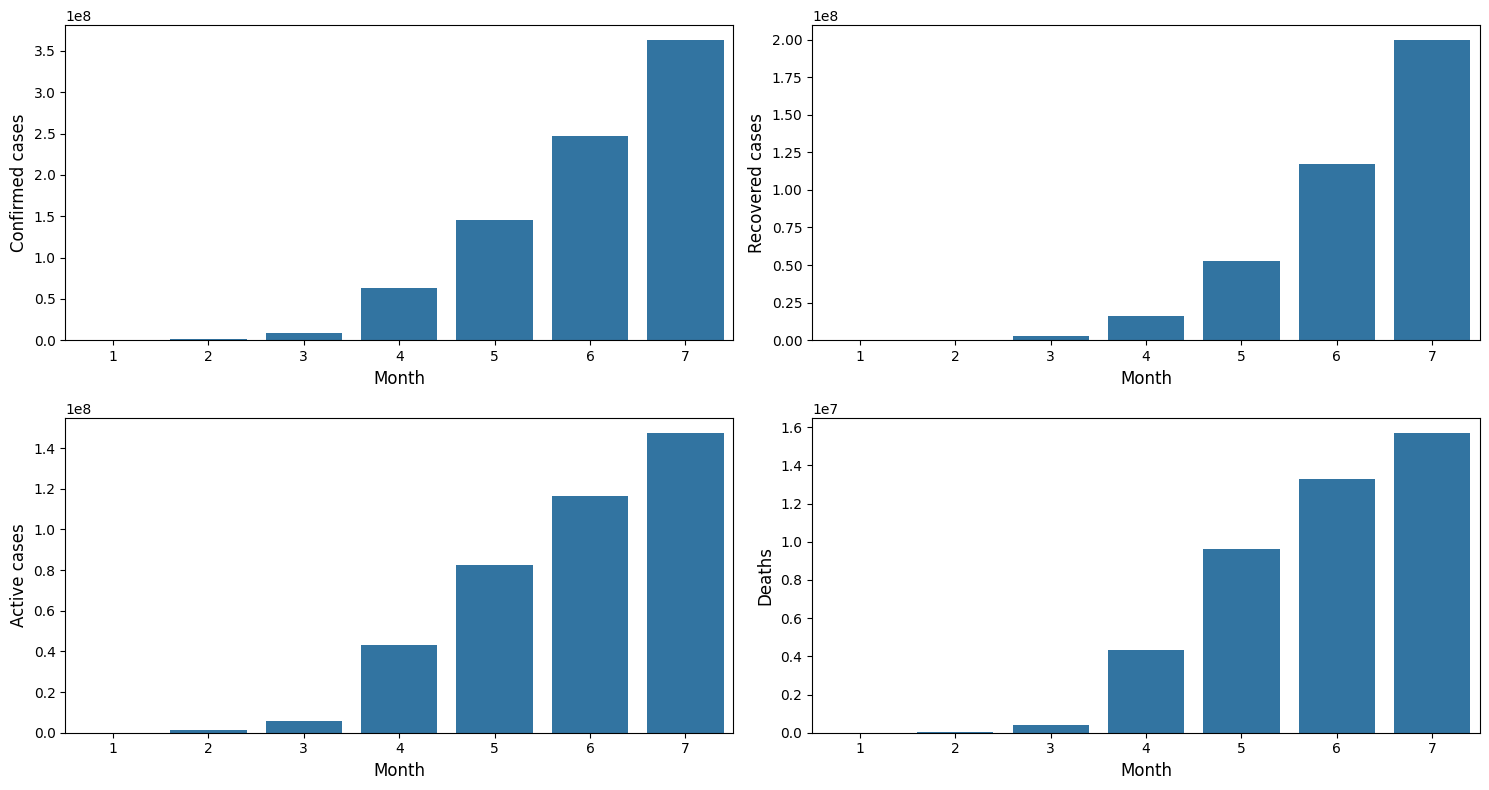

In [17]:
# Plot the responses for different cases and months
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.barplot(data=Confirmed_Month, x="Month", y="Confirmed", ax=axes[0, 0])
axes[0, 0].set_xlabel("Month", fontsize=12)
axes[0, 0].set_ylabel("Confirmed cases", fontsize=12)


sns.barplot(data=Confirmed_Month, x="Month", y="Recovered", ax=axes[0, 1])
axes[0, 1].set_xlabel("Month", fontsize=12)
axes[0, 1].set_ylabel("Recovered cases", fontsize=12)


sns.barplot(data=Confirmed_Month, x="Month", y="Active", ax=axes[1, 0])
axes[1, 0].set_xlabel("Month", fontsize=12)
axes[1, 0].set_ylabel("Active cases", fontsize=12)

sns.barplot(data=Confirmed_Month, x="Month", y="Deaths", ax=axes[1, 1])
axes[1, 1].set_xlabel("Month", fontsize=12)
axes[1, 1].set_ylabel("Deaths", fontsize=12)

plt.tight_layout()
plt.show()

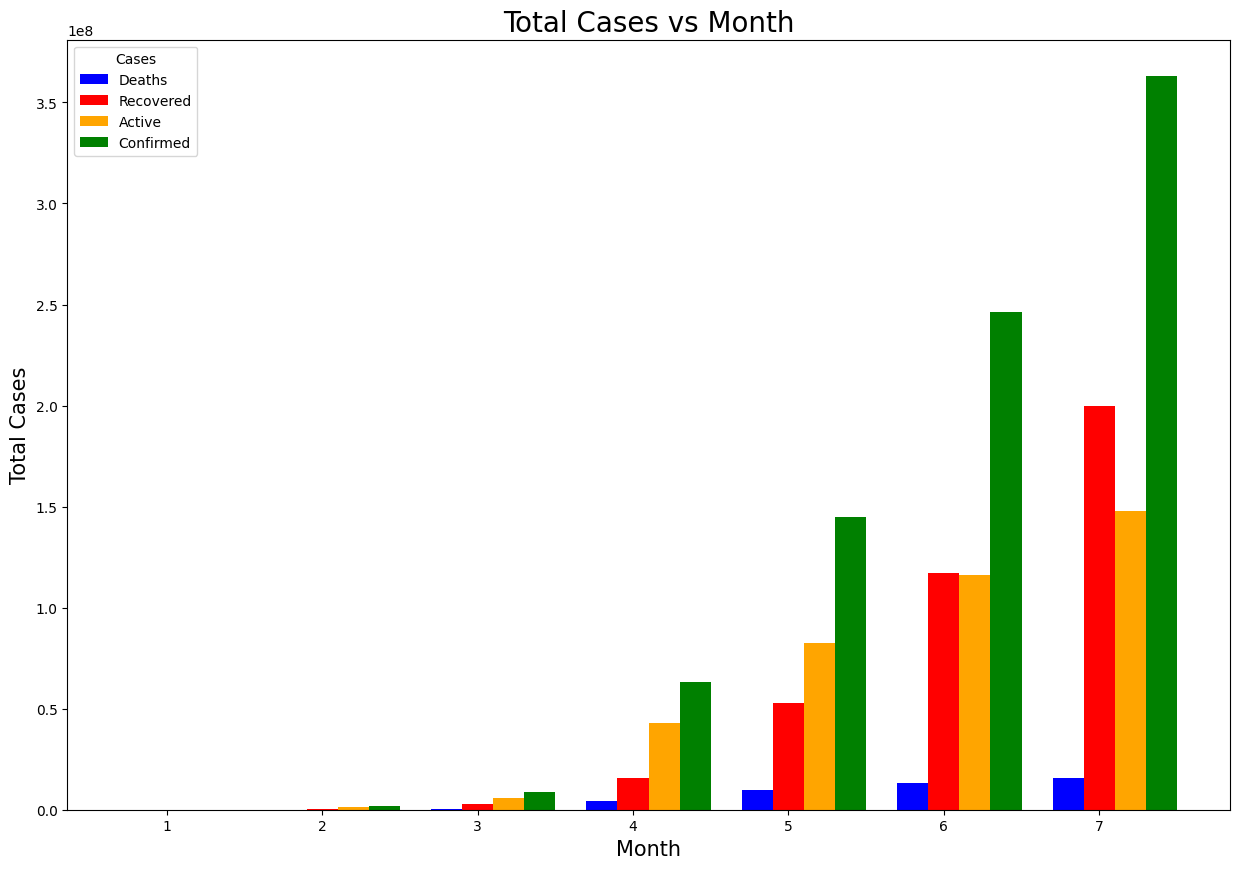

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

x= Confirmed_Month['Month']
y1 = Confirmed_Month['Deaths']
y2 = Confirmed_Month['Recovered']
y3 = Confirmed_Month['Active']
y4 = Confirmed_Month['Confirmed']

ax.bar(x-0.2, y1, 0.2, label= 'Deaths', color='blue')
ax.bar(x, y2, 0.2, label='Recovered', color='red')
ax.bar(x+0.2, y3, 0.2, label= 'Active', color='orange')
ax.bar(x+0.4, y4, 0.2, label= 'Confirmed', color='green')

ax.set_yscale('linear')
ax.set_xlabel('Month', size = 15)
ax.set_ylabel('Total Cases', size = 15)
ax.set_title('Total Cases vs Month', size = 20)
ax.legend(title='Cases')

plt.show()

**Conclusion on the covid cases trend vs time in months:**
1. Month on Month there is increased confirmed cases all around the world
2. On 6th month, recovery rate and active rate starting becoming equal
3. On 7th month, recovery rate increased more than active cases which represent the cases are under control
4. Death rate started reducing from 6th month onwards

In [19]:
Confirmed_10_Countries = df.groupby(["Country/Region"])[["Confirmed", "Active","Deaths","Recovered" ]].sum().sort_values(by= "Confirmed",ascending=False).head(10).reset_index()
Confirmed_10_Countries

,Country/Region,Confirmed,Active,Deaths,Recovered
0,US,224345948,156981121,11011411,56353416
1,Brazil,89524967,31094060,3938034,54492873
2,Russia,45408411,19668578,619385,25120448
3,India,40883464,15987913,1111831,23783720
4,Spain,27404045,9277432,3033030,15093583
5,United Kingdom,26748587,22624595,3997775,126217
6,Italy,26745145,7363518,3707717,15673910
7,France,21210926,10980287,3048524,7182115
8,Germany,21059152,3079991,871322,17107839
9,Iran,19339267,3114236,1024136,15200895


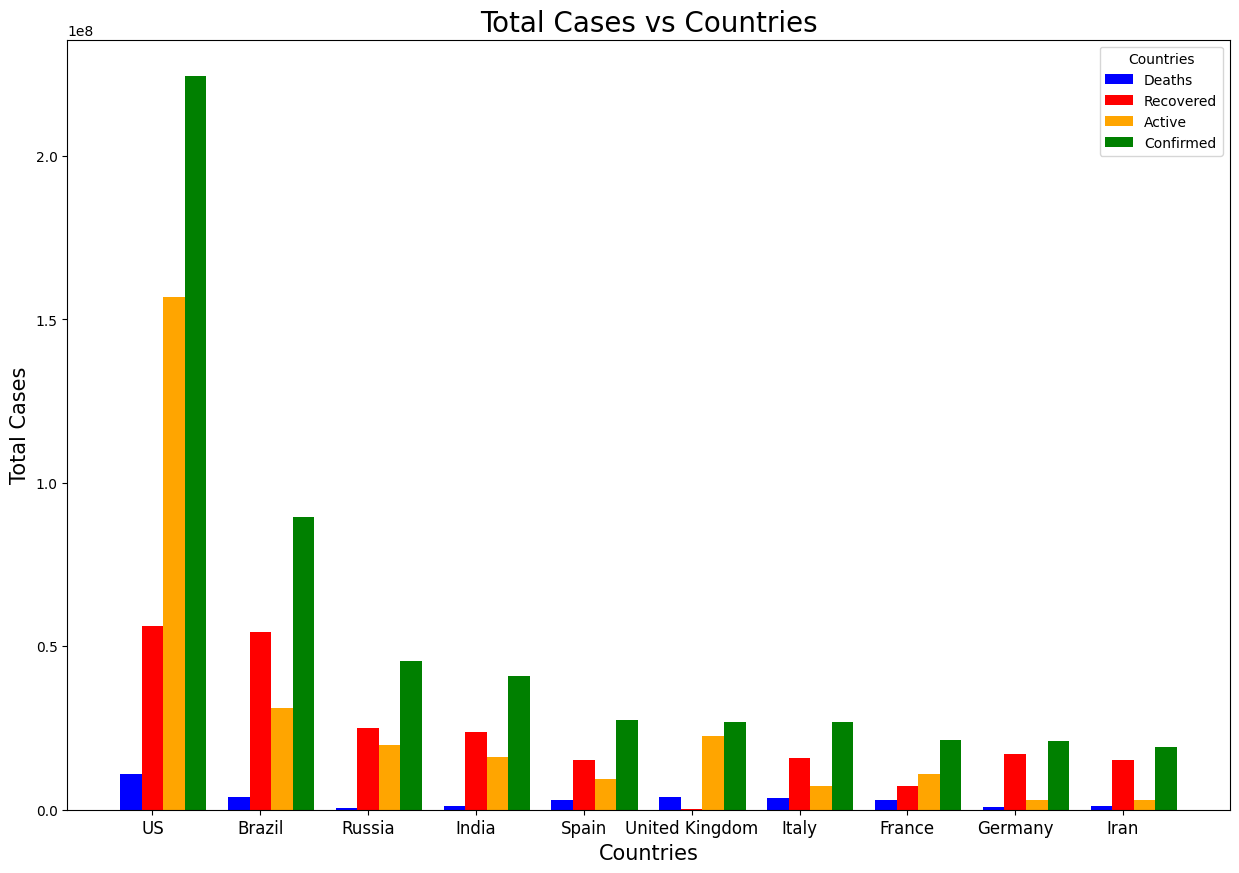

In [20]:
# Plot the responses for different cases and Top 10 countries from confirmed cases perspective
fig, ax = plt.subplots(figsize=(15,10))

x= Confirmed_10_Countries['Country/Region']
y1 = Confirmed_10_Countries['Deaths']
y2 = Confirmed_10_Countries['Recovered']
y3 = Confirmed_10_Countries['Active']
y4 = Confirmed_10_Countries['Confirmed']

X_axis = np.arange(len(x))

ax.bar(X_axis -0.2, y1, 0.2, label= 'Deaths', color='blue')
ax.bar(X_axis, y2, 0.2, label= 'Recovered', color='red')
ax.bar(X_axis+0.2, y3, 0.2, label= 'Active', color='orange')
ax.bar(X_axis+0.4, y4, 0.2, label= 'Confirmed', color='green')

plt.xticks(X_axis, x ,  size = 12)
ax.set_xlabel('Countries', size = 15)
ax.set_ylabel('Total Cases', size = 15)
ax.set_title('Total Cases vs Countries', size = 20)
ax.legend(title='Countries')

plt.show()

**Conclusion on the covid cases trend vs different regions or countries:**
1. US tops in confirmed, active, death rates
2. Even though the recovery of US is at par with Brazil, still the rate of recovery is lower than other Brazil
3. Low recovery rate is seen in UK and also highest active cases rate seen in UK
4. Germany saw highest recovery rate than any other country
5. Russia and Germany saw lowest death rates in order
6. Germany and Iran had lowest active cases which means the spread of the covid cases was fully controlled

In [21]:
Full = df.groupby("Country/Region")[["Confirmed","Active","Deaths","Recovered"]].sum().reset_index()
Full
# 187 countries list is available in total around the world with covid cases data

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [22]:
#Extracting confirmed cases to make predictions about the number of cases expected a week in future based on the current trends

In [23]:
df_1=pd.read_csv("covid_19_clean_complete.csv",parse_dates=["Date"])
df_1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [24]:
Confirmed1 = df_1.groupby("Date").sum()["Confirmed"].reset_index()
Confirmed1

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [26]:
#there should be only 2 columns passed
#the column names should always be ---> 'ds','y'

Confirmed1.columns = ["ds", "y"]  #ds ---> date stamp, y ----> target
Confirmed1["ds"] = pd.to_datetime(Confirmed1['ds'])
Confirmed1.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [27]:
#For buildign a forecasting model using fbprophet library --> install prophet library first

In [28]:
pip install Prophet

In [30]:
from prophet import Prophet

In [31]:
# Start with the forecasting execution¶

In [32]:
import sklearn

In [33]:
# define the model
model = Prophet()

# fit the model
model.fit(Confirmed1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66ksz7j1/6ipacgro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66ksz7j1/6yce646n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65766', 'data', 'file=/tmp/tmp66ksz7j1/6ipacgro.json', 'init=/tmp/tmp66ksz7j1/6yce646n.json', 'output', 'file=/tmp/tmp66ksz7j1/prophet_modelymo6h88r/prophet_model-20241227073135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
Future = model.make_future_dataframe(periods = 10) #this will forecast the data for next 10 days

In [35]:
Future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05


In [36]:
Forecast = model.predict(Future)
Forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
193,2020-08-02,1.736430e+07,1.724835e+07,1.748111e+07
194,2020-08-03,1.755889e+07,1.743254e+07,1.767795e+07
195,2020-08-04,1.774813e+07,1.762298e+07,1.786685e+07
196,2020-08-05,1.795791e+07,1.783058e+07,1.808704e+07
197,2020-08-06,1.817184e+07,1.803137e+07,1.830457e+07


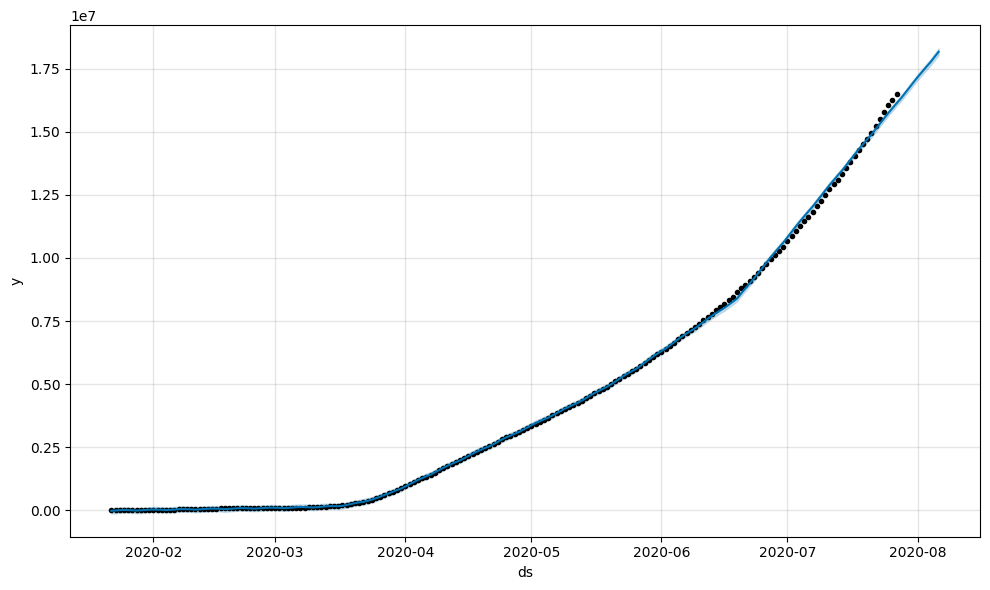

In [38]:
Confirmed1_forecasting_plot=model.plot(Forecast)

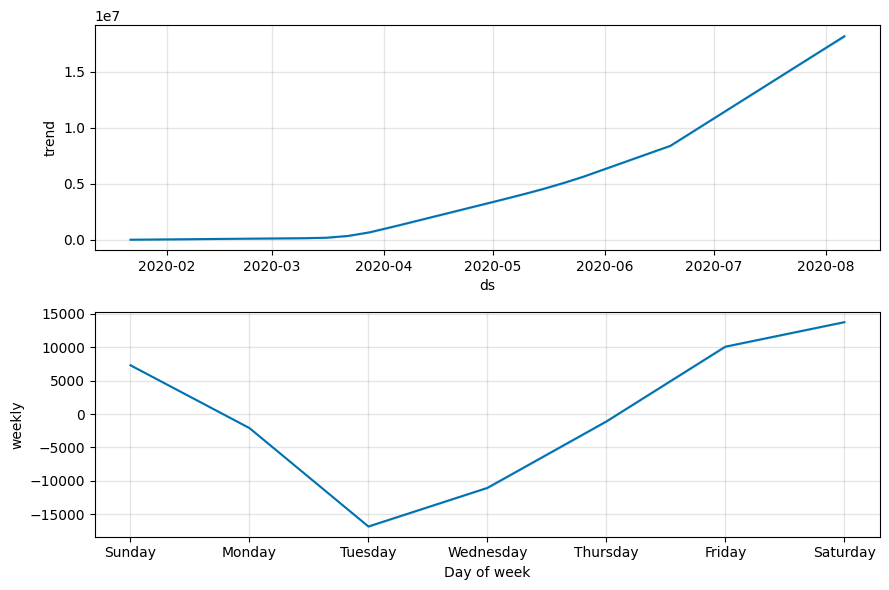

In [42]:
Confirmed1_forecasting_plot1=model.plot_components(Forecast)

In [43]:
Deaths1 = df_1.groupby("Date").sum()["Deaths"].reset_index()
Deaths1

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [46]:
#there should be only 2 columns passed
#the column names should always be ---> 'ds','y'

Deaths1.columns = ["ds", "y"]  #ds ---> date stamp, y ----> target
Deaths1["ds"] = pd.to_datetime(Deaths1['ds'])
Deaths1.tail()

,ds,y
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621
187,2020-07-27,654036


In [49]:
# define the model
model1 = Prophet()
# fit the model
model1.fit(Deaths1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66ksz7j1/c5r0xcvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66ksz7j1/xv6oe9fl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38040', 'data', 'file=/tmp/tmp66ksz7j1/c5r0xcvr.json', 'init=/tmp/tmp66ksz7j1/xv6oe9fl.json', 'output', 'file=/tmp/tmp66ksz7j1/prophet_modelh1vjz5pu/prophet_model-20241227074507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
Future1 = model1.make_future_dataframe(periods = 10) #this will forecast the data for next 10 days

In [55]:
Forecast1 = model1.predict(Future1)
Forecast1[["ds","yhat","yhat_lower","yhat_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652315.566446,650298.816347,654338.169269
189,2020-07-29,657882.129102,655870.502990,659993.174752
190,2020-07-30,663491.395651,661253.437872,665683.340245
191,2020-07-31,669006.394312,666844.892404,671058.958245
192,2020-08-01,673888.426957,671443.054883,676183.198858
193,2020-08-02,678025.345020,675290.676628,680533.229459
194,2020-08-03,682315.659400,679513.968398,685136.962293
195,2020-08-04,687521.418409,684223.543963,690426.122601
196,2020-08-05,693087.981064,689135.864147,696607.282864
197,2020-08-06,698697.247613,694180.980174,702532.089116


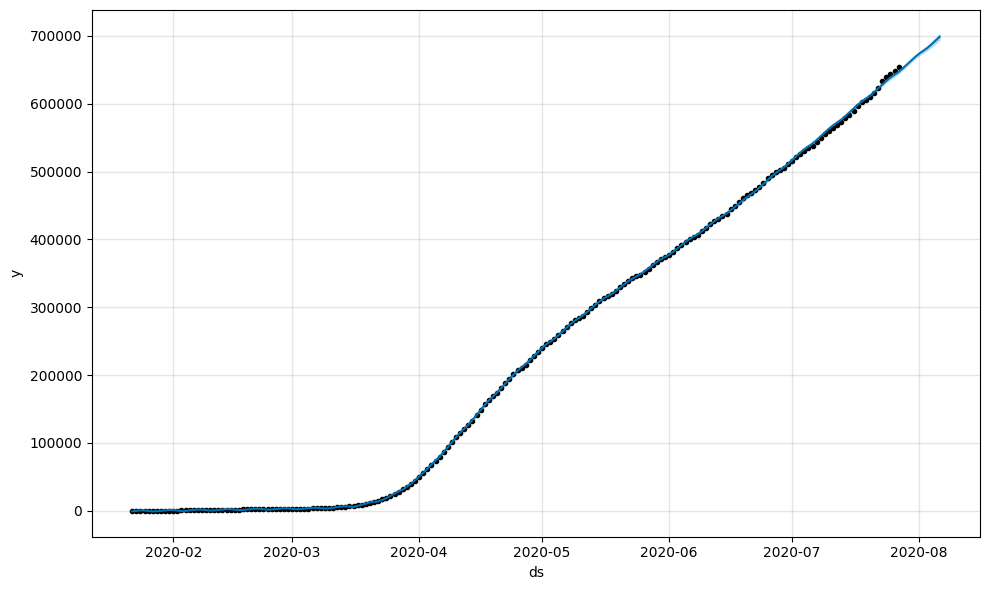

In [53]:
#Prediction for deaths for next 10 days
Deaths1_forecasting_plot=model1.plot(Forecast1)

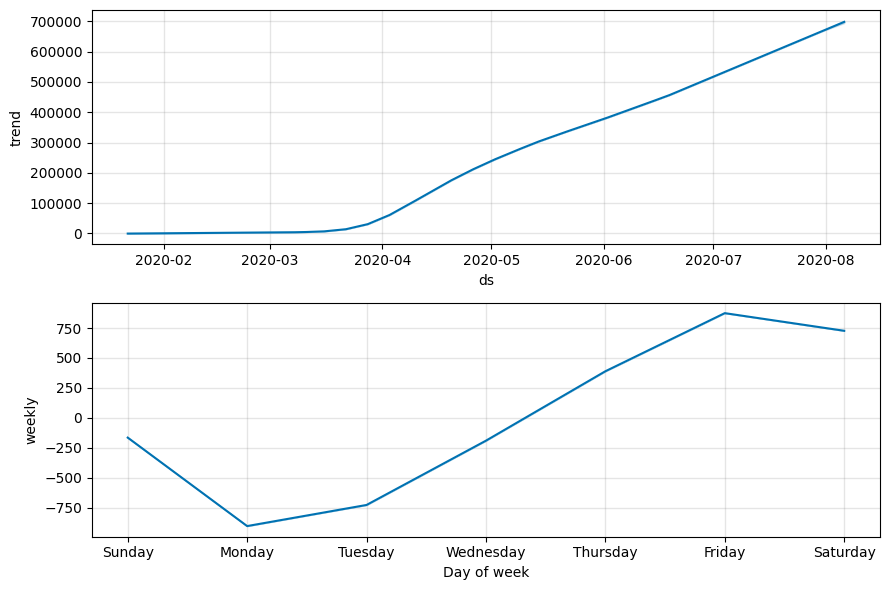

In [54]:
Deaths1_forecasting_plot1=model1.plot_components(Forecast1)